In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [48]:
data = pd.read_csv('Airline_Delay_Cause.csv')

In [49]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [50]:
data.shape

(171666, 21)

In [51]:
data.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [52]:
data2 = data[['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_delay']]

In [53]:
data2.head()

,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_delay
0,89.0,2.25,1.60,3.16,0.0,5.99,1375.0
1,62.0,1.97,0.04,0.57,0.0,7.42,799.0
2,62.0,2.73,1.18,1.80,0.0,4.28,766.0
3,66.0,3.69,2.27,4.47,0.0,1.57,1397.0
4,92.0,7.76,0.00,2.96,0.0,11.28,1530.0


In [54]:
data2 = data2.dropna()

In [55]:
data2.columns

Index(['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_delay'],
      dtype='object')

In [60]:
from sklearn.linear_model import LinearRegression

X = data2[['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]
y = data2['arr_delay']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  -0.97909458   66.41556274  320.99938331   75.16543643 -395.80486943
   58.1717183 ]
Intercept: -286.52871486465756


<ipython-input-61-c42af92eb294>:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


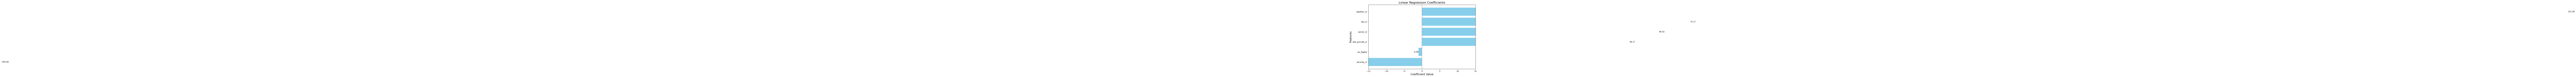

In [61]:
features = X.columns
coefficients = model.coef_

# Sort the coefficients by magnitude for better visualization
sorted_indices = np.argsort(coefficients)
sorted_features = features[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot the coefficients
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_coefficients, color="skyblue")
plt.axvline(0, color="gray", linestyle="--")  # Add a vertical line at zero

# Add numeric labels to the bars
for bar, coef in zip(bars, sorted_coefficients):
    plt.text(
        coef,  # Position label at the bar's end
        bar.get_y() + bar.get_height() / 2,  # Center label vertically
        f"{coef:.2f}",  # Format coefficient to 2 decimal places
        va="center",  # Align vertically
        ha="left" if coef > 0 else "right",  # Align text based on sign
        fontsize=10,
        color="black"
    )

# Add titles and labels
plt.title("Linear Regression Coefficients", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Set x-axis limits
plt.xlim(-15, 15)

plt.tight_layout()
plt.show()